### Módulo 3 | PAIR PROGRAMMING | Regresión 4 | 30/05/22 | Almudena & Lara

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
df = pd.read_csv("mdc_num_esc.csv", index_col=0, encoding="latin-1")
df.head(2)

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
0,-4.375529,5.123971,-0.832131,-1.217868,-1.229057,-2.046064,-1.854111,0.677915,-1.537205,-1.712912
1,-1.429412,-0.604692,-1.464796,-1.104512,-1.134723,-1.602010,-1.317328,-1.275902,-1.027573,-1.674419


# Ejercicio 1
Tomando los datos del mejor modelo obtenido en la clase de la pair de ayer.
- Investiga la multicolinealidad de las variables independientes.
- Selecciona aquellas variables que tengan una colinealidad dentro de los margenes estandar. Mostrando como se han ido eliminando las variables y como han cambiado los resultados del VIF.
- Realiza un modelo de regresión lineal multiple para ver si se han mejorado los resultados obtenidos.




<font color = orange> Rehacemos el modelo de regresión múltiple con todas las variables numéricas ya estandarizadas.

In [16]:
ind = df[['year', 'runtime', 'imdb_votes', 'imdb_gross',
       'tomato_meter', 'tomato_review', 'tom_aud_score', 'tom_ratings', 'id']]
dep = df["imdb_rating"]

In [17]:
# Separamos la muestra de los conjuntos train/test 80/20.
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.2,random_state = 1)

# Realizamos la regresión lineal. Ajustándola a nuestros datos de entrenamiento para las variables independientes y la dependiente.
LR = LinearRegression() 
LR.fit(ind_train, dep_train)

#Creamos una predicción de la variable dependiente, a partir de los datos de las independientes (entrenamiento)
dep_prediction_train =  LR.predict(ind_train)

#Calculamos el R2_ajustado para nuestras muestras de entrenamiento:
r2_ajustado_train = 1 - (1-r2_score(dep_train,dep_prediction_train)) * (ind_train.shape[0]-1)/(ind_train.shape[0]- ind_train.shape[1]-1)
print("El r2 ajustado la predicción de entrenamiento es:", r2_ajustado_train)

#Realizamos una predicción de la variable dependiente a partir de los datos de test de las independientes:
dep_prediction =  LR.predict(ind_test)
dep_prediction

# Calculamos el R2_ajustado entre las predicciones de la variable dependiente, y los datos de test:
r2_ajustado_test = 1 - (1-r2_score(dep_test, dep_prediction)) * (ind_test.shape[0]-1)/(ind_test.shape[0]- ind_test.shape[1]-1)
print("El r2 ajustado la predicción del test es:", r2_ajustado_test)

El r2 ajustado la predicción de entrenamiento es: 0.9117738734360294
El r2 ajustado la predicción del test es: 0.75337076882087


<font color = orange > Hacemos el VIF para todo el dataframe:

In [18]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [19]:
get_VIF(df, "imdb_rating")


tomato_review    8.118931
year             4.573670
imdb_gross       3.610089
tom_aud_score    3.362895
imdb_votes       3.018901
tomato_meter     3.014114
tom_ratings      1.715275
runtime          1.587909
id               1.290979
const            1.000000
dtype: float64

In [20]:
get_VIF(df.drop(columns = "tomato_review"), "imdb_rating")

tom_aud_score    3.067890
imdb_votes       3.017341
tomato_meter     3.010525
imdb_gross       2.921642
tom_ratings      1.495799
runtime          1.450158
year             1.434093
id               1.265673
const            1.000000
dtype: float64

In [21]:
ind = df[['year', 'runtime', 'imdb_votes', 'imdb_gross',
       'tomato_meter', 'tom_aud_score', 'tom_ratings', 'id']]
dep = df["imdb_rating"]

In [22]:
# Separamos la muestra de los conjuntos train/test 80/20.
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.2, random_state = 1)

# Realizamos la regresión lineal. Ajustándola a nuestros datos de entrenamiento para las variables independientes y la dependiente.
LR = LinearRegression() 
LR.fit(ind_train, dep_train)

#Creamos una predicción de la variable dependiente, a partir de los datos de las independientes (entrenamiento)
dep_prediction_train =  LR.predict(ind_train)

#Calculamos el R2 y el R2_ajustado para nuestras muestras de entrenamiento:
print("PARA EL CONJUNTO DE ENTRENAMIENTO:")
print('- El valor de r2 score es ',r2_score(dep_train,dep_prediction_train))
r2_ajustado_train = 1 - (1-r2_score(dep_train,dep_prediction_train)) * (ind_train.shape[0]-1)/(ind_train.shape[0]- ind_train.shape[1]-1)
print("- El r2 ajustado de la predicción de entrenamiento es:", r2_ajustado_train)
#Y las métricas:
print('- El MAE es',mean_absolute_error(dep_train,dep_prediction_train))
print('- EL RMSE es ',np.sqrt(mean_squared_error(dep_train,dep_prediction_train)))


#Realizamos una predicción de la variable dependiente a partir de los datos de test de las independientes:
dep_prediction =  LR.predict(ind_test)
dep_prediction

# Calculamos el R2 y el R2_ajustado entre las predicciones de la variable dependiente, y los datos de test:
print()
print("PARA EL CONJUNTO TEST+PREDICCIÓN:")
print('- El valor de r2 score es ',r2_score(dep_test,dep_prediction))
r2_ajustado_test = 1 - (1-r2_score(dep_test, dep_prediction)) * (ind_test.shape[0]-1)/(ind_test.shape[0]- ind_test.shape[1]-1)
print("- El r2 ajustado de la predicción del test es:", r2_ajustado_test)
# Y las métricas:
print('- El MAE es',mean_absolute_error(dep_test, dep_prediction))
print('- EL RMSE es ',np.sqrt(mean_squared_error(dep_test, dep_prediction)))

PARA EL CONJUNTO DE ENTRENAMIENTO:
- El valor de r2 score es  0.9229364003457361
- El r2 ajustado de la predicción de entrenamiento es: 0.9131505464213852
- El MAE es 0.20594992393988493
- EL RMSE es  0.2743593067770082

PARA EL CONJUNTO TEST+PREDICCIÓN:
- El valor de r2 score es  0.8867956151376871
- El r2 ajustado de la predicción del test es: 0.7861694952600757
- El MAE es 0.29164465116052374
- EL RMSE es  0.34528704469578353


# Ejercicio 2
Estudia si tus resultados son acordes a las asunciones de linealidad.
Toma ahora el dataset del mejor modelo obtenido y aplica los siguentes modelos de regresión con regularización.
- Ridge
- Lasso


<font color=orange> Damos un paseo por las asunciones de linealidad. Gráficas, acompañadnos:

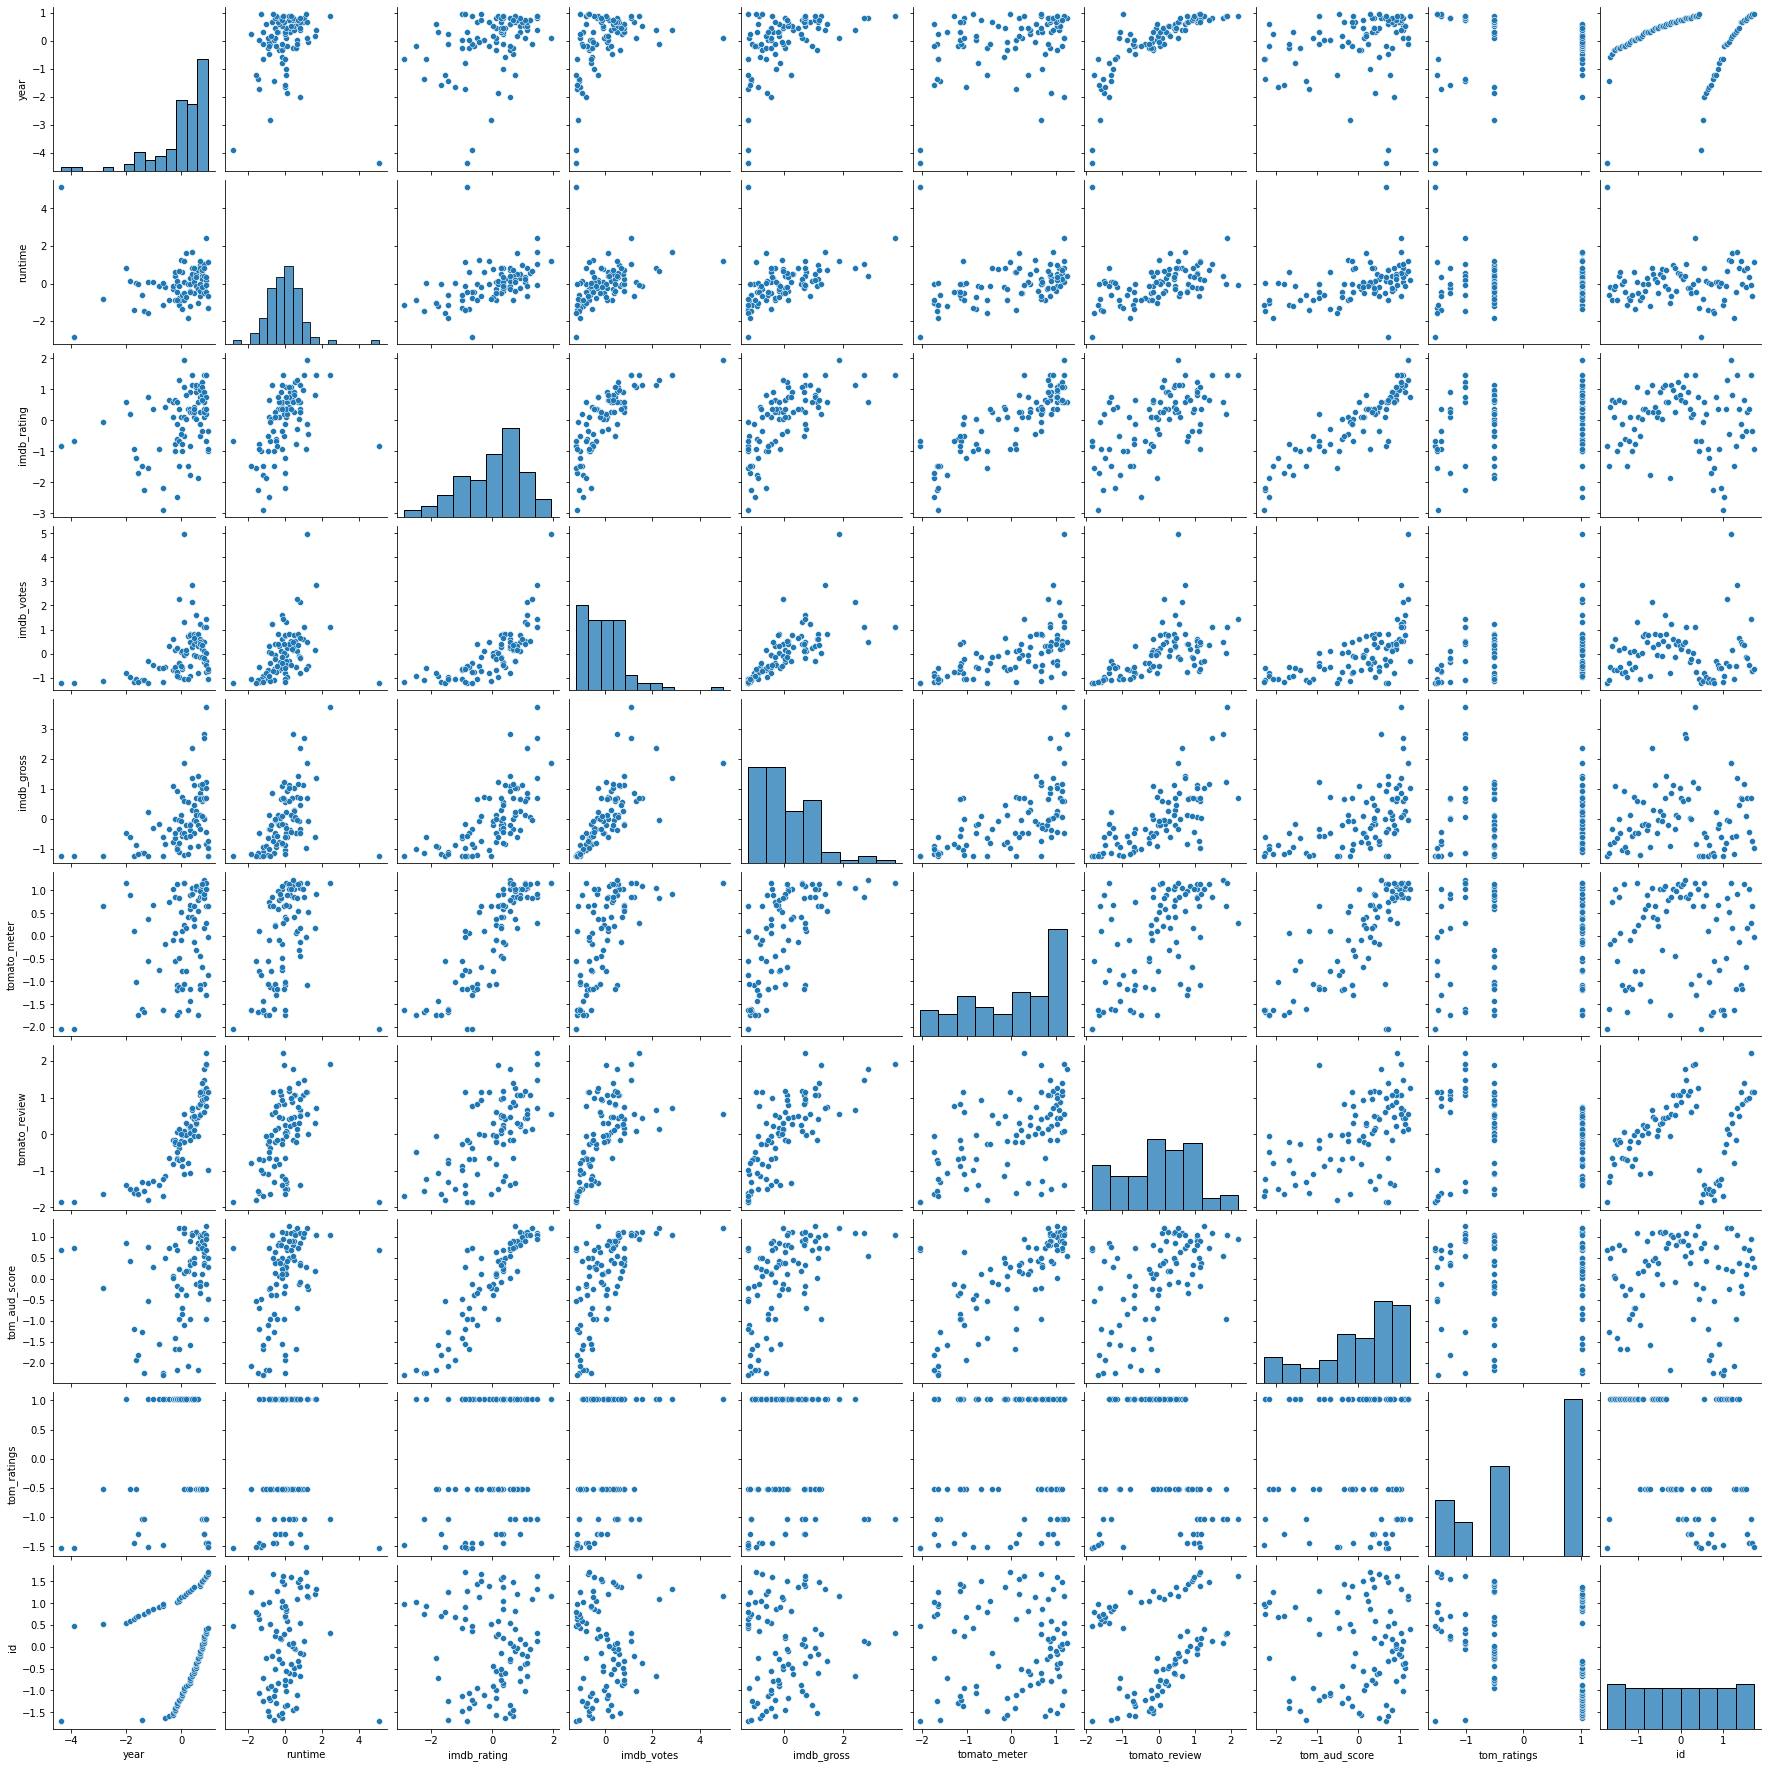

In [23]:
# 1. Linealidad

sns.pairplot(data = df)
plt.show()

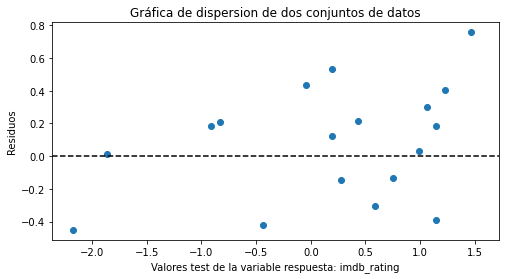

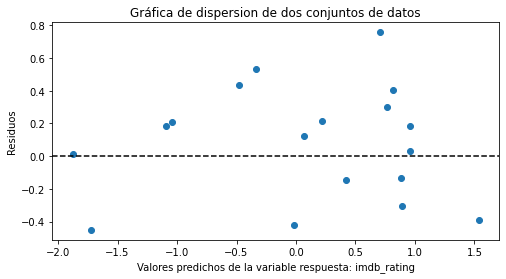

/home/adalaber/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


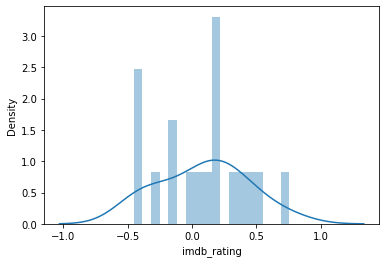

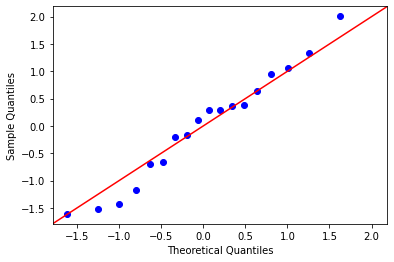

In [24]:
residuals = (dep_test - dep_prediction)

# 2. Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x= dep_test , y=residuals)
plt.axline((float(min(dep_prediction)),0),(float(max(dep_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Valores test de la variable respuesta: imdb_rating')
ax.set_ylabel('Residuos')
plt.show()


# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=dep_prediction , y=residuals)
plt.axline((float(min(dep_prediction)),0),(float(max(dep_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Valores predichos de la variable respuesta: imdb_rating')
ax.set_ylabel('Residuos')
plt.show()

# 4. Normalidad
# preprocessing.normalize()
fig = plt.figure()
sns.distplot(residuals, bins = len(residuals))

sm.qqplot(residuals, line = '45', fit = True)
plt.show()

<font color = orange> ¿Disfrutaste del paseo? ¿Sientes mareos? 
- ¡¡RIDGE Y LASSO IN DA HOUSE!!

<font color = orange> **RIDGE**

In [57]:
ind = df[['year', 'runtime', 'imdb_votes', 'imdb_gross',
       'tomato_meter', 'tomato_review', 'tom_aud_score', 'tom_ratings', 'id']]
dep = df["imdb_rating"]

In [58]:
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.2) 

In [59]:
LR = Ridge(normalize= True) 

In [60]:
LR.fit(ind_train, dep_train)

Ridge(normalize=True)

In [64]:
dep_train = dep_train

In [ ]:
y_prediction_train =  LR.predict(dep_train)

In [ ]:
Adj_r2_train = 1 - (1-r2_score(dep_train,y_prediction_train)) * (dep_train.shape[0]-1)/(dep_train.shape[0] - dep_train.shape[1]-1)

y_prediction =  LR.predict(dep_test)
Adj_r2_test = 1 - (1-r2_score(dep_test, y_prediction)) * (dep_test.shape[0]-1)/(dep_test.shape[0]-dep_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(dep_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(dep_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(dep_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(dep_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(dep_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(dep_test,y_prediction)))

<font color = orange> **LASSO**

In [52]:
# Creamos la regresiónn lineal
LR = Lasso(normalize= True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo
LR.fit(ind_train,dep_train)

Lasso(normalize=True)

In [ ]:
y_prediction_train =  LR.predict(dep_train)
Adj_r2_train = 1 - (1-r2_score(dep_train,y_prediction_train)) * (dep_train.shape[0]-1)/(dep_train.shape[0] - dep_train.shape[1]-1)

y_prediction =  LR.predict(dep_test)
Adj_r2_test = 1 - (1-r2_score(dep_test, y_prediction)) * (dep_test.shape[0]-1)/(dep_test.shape[0]-dep_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(dep_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(dep_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(dep_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(dep_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(dep_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(dep_test,y_prediction)))

# Ejercicio 3
Compara los resultados del ajuste lineal multiple donde se han eliminado variables y los obtenidos aplicando las regresiones de tipo Ridge y Lassso. Explica los resultados obtenidos.